## 회귀분석  
  
EURO STOXX 50과 VSTOXX 자료를 통해 전개할 예정

In [76]:
import pandas as pd
from urllib.request import urlretrieve
import os
import numpy as np
from stat import *
import matplotlib.pyplot as plt

In [2]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!dir -o ./data/*.txt

매개 변수 포맷이 틀립니다 - "data".


In [3]:
lines = open('./data/es.txt','r').readlines()
lines = [line.replace(' ','') for line in lines]

In [4]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [5]:
for line in lines[3883:3890]:
    print (line[41:],)

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



1 새로운 텍스트 파일을 생성한다.  
2 필요없는 헤더를 지운다.  
3 새 파일에 적절한 새 헤더를 쓴다.  
4 줄 끝의 세미콜론을 잡아내기 위해 DEL이라는 보조 열을 추가한다.  
5 모든 자료를 새 파일에 쓴다.  


In [6]:
new_file = open('./data/es50.txt', 'w')
new_file.write('date' + lines[3][:-1]
              + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [7]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [9]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es)

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
1986-12-31,775.0,901.0,83.0,99.0,98.0,69.0,645.0,66.0,NaN
1987-01-01,775.0,901.0,83.0,99.0,98.0,69.0,645.0,66.0,NaN
1987-01-02,771.0,892.0,83.0,98.0,97.0,69.0,648.0,66.0,NaN
1987-01-05,772.0,898.0,83.0,99.0,98.0,69.0,650.0,66.0,NaN
1987-01-06,776.0,902.0,83.0,99.0,99.0,70.0,652.0,66.0,NaN
...,...,...,...,...,...,...,...,...,...
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN


In [10]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


### read_csv로 효과적으로 임포트 하기

In [15]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';',
                 dayfirst=True, header=None, skiprows=4, names=cols)


In [16]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, 
                 parse_dates=True, sep=',', dayfirst=True)
vs.tail()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [17]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                    es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                             vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [22]:
data = data.fillna(method='ffill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E81AC79080>,
      dtype=object)

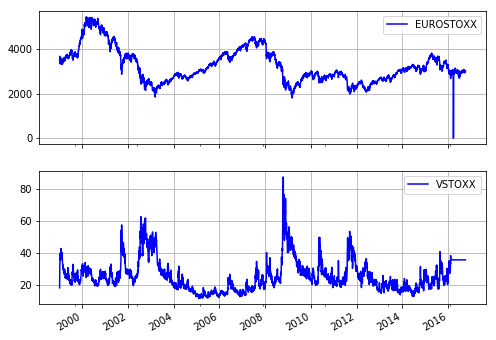

In [23]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [24]:
# 두 시계열의 로그 수익률
rets = np.log(data / data.shift(1))
rets.head()

C:\Users\tohot\Anaconda3\envs\fba_1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E81C076208>,
      dtype=object)

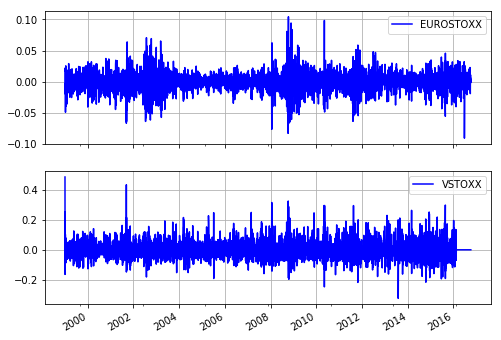

In [25]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6))

유로스톡스50 수익률을 독립변수로, vstoxx 수익률을 종속변수로 한다.

In [57]:
rets = pd.DataFrame(rets)
rets = rets.dropna()

In [60]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']


(array([], dtype=int64),)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [67]:
x = xdat.values.reshape(-1,1)
y = ydat.values.reshape(-1,1)
model = lr.fit(x, y)

In [74]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"slope {slope: .2f}, and intercept {intercept:.2f}")

slope -2.75, and intercept 0.00


(-0.11103092419607541,
 0.13529756105498195,
 -0.3832536169221184,
 0.5307954962421255)

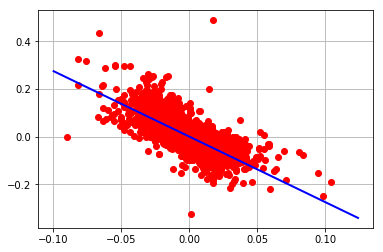

In [83]:
plt.plot(xdat, ydat, 'ro')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, intercept + slope * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.grid(True)
plt.axis('tight')

### 이동 상관 계수

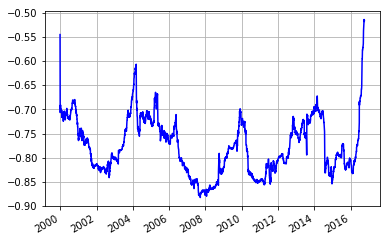

In [87]:
rets['EUROSTOXX'].rolling(252).corr(rets['VSTOXX']).plot(grid=True, style='b')